## Online Marketplace Database analys

### Data import and Exploration

proses yang dilakukan pada tahap ini adalah melakukan import data yang di berikan dengan menggunakan beberapa library python,
dengan tujuan eksplorasi data mengenai order dan shipping sebagai problem utama yang akan di eksplorasi

In [5]:
# import all library that needed
import pandas as pd
import numpy as np
import sqlite3 as sql
from IPython.display import Image
import seaborn as sns
import matplotlib as plt
import dataframe_image as dfi

# create connection to database file
database = "olist.db"
connection = sql.connect(database)
cur = connection.cursor()

In [6]:
# print all table in database
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")] # fungsi ini akan membuat list table yang terdabat dalam file database yang ada
print(table_list)

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


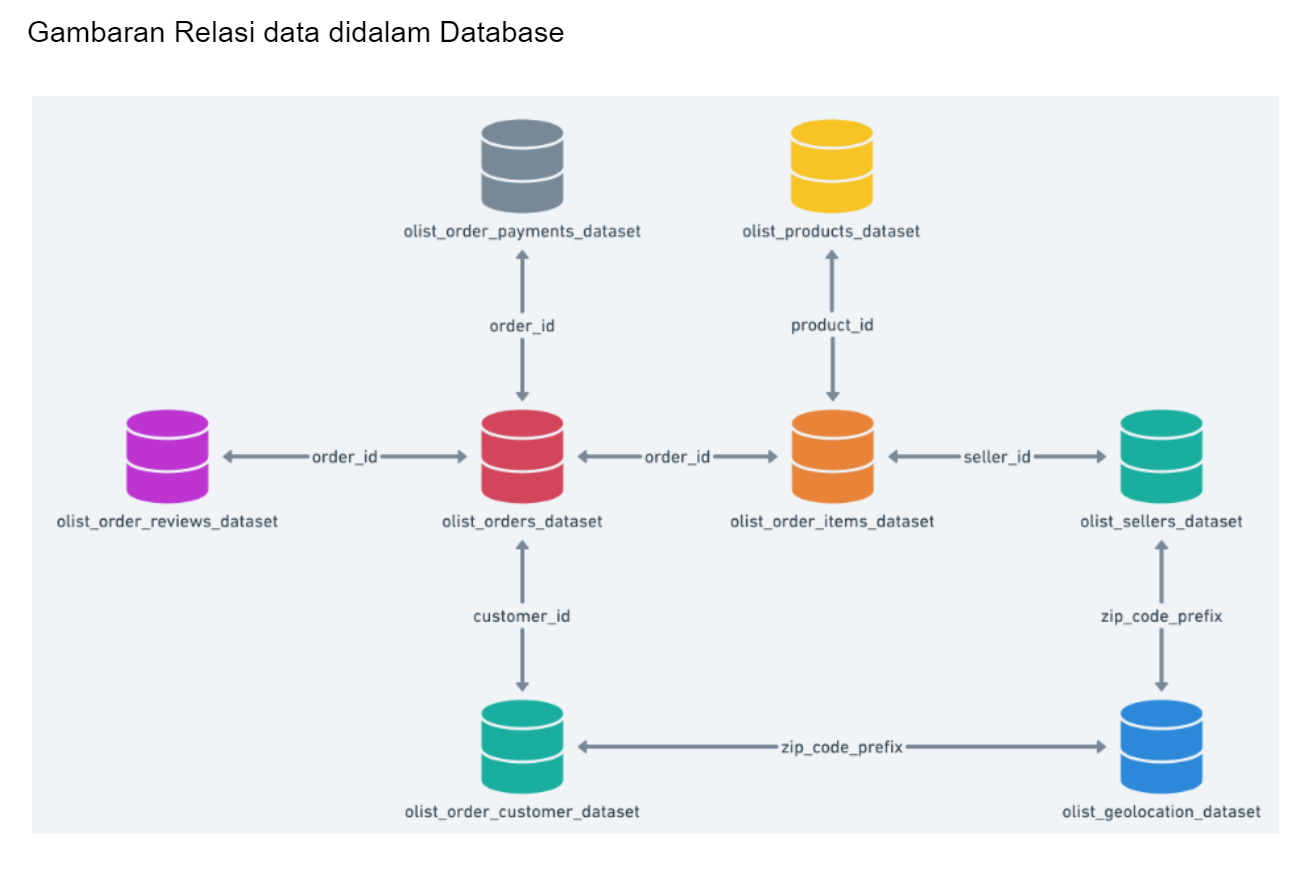

In [7]:
# show all database data realtion
Image(filename='RED.png') 

### 1. Mencari sales summary per item

In [8]:
# make order_items table
df_order_items = "SELECT * FROM olist_order_items_dataset"
order_items_table = pd.read_sql_query(df_order_items, connection)

# make products table 
df_products = "SELECT * FROM olist_products_dataset"
products_table = pd.read_sql_query(df_products, connection)

# make products eng name table 
df_products_translate = "SELECT * FROM product_category_name_translation"
products_eng_table = pd.read_sql_query(df_products_translate, connection)

# Merge two table with product id as join
sales_products = order_items_table.merge(products_table, on = "product_id")
sales_products = sales_products.merge(products_eng_table, on = "product_category_name")

In [9]:
# show prduct sales tabel
sales_products

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index,product_category_name_english
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22,cool_stuff
1,8346,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.90,17.96,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22,cool_stuff
2,36646,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22,cool_stuff
3,49108,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.90,16.17,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22,cool_stuff
4,55021,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.90,13.29,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,22,cool_stuff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,81651,b99217b1fcf2fdeace7b8d869b76cb91,1,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-13 17:55:36,39.99,10.15,25495,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,69,fashion_childrens_clothes
111019,82883,bc3ac768a8963f4ca68942ea6558fc9f,1,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-28 03:09:01,39.99,6.43,25495,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,69,fashion_childrens_clothes
111020,89240,cab08f0417a702d0f4782ec02356a4ac,1,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2017-10-09 04:28:12,89.99,17.07,1489,fashion_roupa_infanto_juvenil,47.0,327.0,3.0,300.0,30.0,20.0,20.0,69,fashion_childrens_clothes
111021,89524,cb53f0b6e8f9082a9f5a113765dd1236,1,8cfc3506cedc0626364457d254429118,dbb9b48c841a0e39e21f98e1a6b2ec3e,2018-06-11 22:50:09,89.99,7.49,1489,fashion_roupa_infanto_juvenil,47.0,327.0,3.0,300.0,30.0,20.0,20.0,69,fashion_childrens_clothes


In [10]:
# find missing value
sales_products.isna().sum() # because we need only product category name and price product dimension doesn't need we proses

index_x                          0
order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
index_y                          0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
index                            0
product_category_name_english    0
dtype: int64

In [11]:
# find duplicated data in dataset
sales_products.duplicated(keep=False).sum()

0

In [12]:
# define coloum that needed for analysis
coll_1 = ["product_category_name_english", "price"]
category_grouping = sales_products[coll_1].groupby("product_category_name_english").agg(['max', 'min', 'sum', 'mean'],inplace=True)
table_1 = category_grouping.sort_values(by =["product_category_name_english"], ascending= True )
table_1

price                               
                                   max    min         sum        mean
product_category_name_english                                        
agro_industry_and_commerce     2990.00  12.99    72530.47  342.124858
air_conditioning               1599.00  10.90    55024.96  185.269226
art                            6499.00   3.50    24202.64  115.802105
arts_and_craftmanship           289.49   9.80     1814.01   75.583750
audio                           598.99  14.90    50688.50  139.254121
...                                ...    ...         ...         ...
stationery                     1693.00   2.29   230943.23   91.753369
tablets_printing_image          889.99  14.90     7528.41   90.703735
telephony                      2428.00   5.00   323667.53   71.213978
toys                           1699.99   4.90   483946.60  117.548360
watches_gifts                  3999.90   8.99  1205005.68  201.135984

[71 rows x 4 columns]

### 2. Mencari jumlah penjualan per region

In [13]:
# show 
order_items_table.head()

# make order_items table
df_customer = "SELECT * FROM olist_order_customer_dataset"
customer_table = pd.read_sql_query(df_customer, connection)
customer_table.head()

# make order_items table
df_order = "SELECT * FROM olist_order_dataset"
order_table = pd.read_sql_query(df_order, connection)
order_table.head()


,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
# finding how many state in the table
customer_table["customer_state"].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [15]:
# merge table
sales_region = customer_table.merge(order_table, on = "customer_id")
sales_region = sales_region.merge(order_items_table, on = "order_id")

# show price and customer state 
coll_2 = ["customer_state", "price"]
sales_per_state = sales_region[coll_2]
sales_per_state

,customer_state,price
0,SP,124.99
1,SP,289.00
2,SP,139.94
3,SP,149.94
4,SP,230.00
...,...,...
112645,SP,74.90
112646,SP,114.90
112647,CE,37.00
112648,RS,689.00


In [17]:
# finding duplicate data 
sales_region.duplicated(keep=False).sum()

0

In [18]:
# find missing value
sales_region.isna().sum() # because we need only product category name and price product dimension doesn't need we proses

index_x                             0
customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
index_y                             0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
index                               0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [19]:
# grouping sales setiap region
table_2 = sales_per_state.groupby(by="customer_state").sum().sort_values(by="price", ascending=False)
table_2

,price
customer_state,
SP,5202955.05
RJ,1824092.67
MG,1585308.03
RS,750304.02
PR,683083.76
SC,520553.34
BA,511349.99
DF,302603.94
GO,294591.95


### 3. Mencari jumlah penjualan per region setiap bulan

In [16]:
# transform order purchase timestamp form data type object to date time
sales_region["order_purchase_timestamp"] = pd.to_datetime(sales_region["order_purchase_timestamp"])
sales_region["Day"] = sales_region["order_purchase_timestamp"].dt.day
sales_region["Month"] = sales_region["order_purchase_timestamp"].dt.month
sales_region["Year"] = sales_region["order_purchase_timestamp"].dt.year

# grouping tabel using year and month transaction
sales_per_month = sales_region.groupby(by=["customer_state","Year","Month"])["price"].sum()
sales_per_month

customer_state  Year  Month
AC              2017  1         589.60
                      2         450.40
                      3         455.99
                      4        1162.38
                      5        2094.39
                                ...   
TO              2018  4        4291.82
                      5        2739.99
                      6        4049.42
                      7        2613.67
                      8        1925.97
Name: price, Length: 559, dtype: float64

### 4. mencari metode pembayaran yang sering digunakan pada region yang memiliki sales terbanyak

In [17]:
# make order_items tabel
df_payment = "SELECT * FROM olist_order_payments_dataset"
payment_table = pd.read_sql_query(df_payment, connection)
payment_table

# merge two tabel
customer_payment = payment_table.merge(sales_region, right_on= "order_id", left_on="order_id",
                    suffixes=("_left", "_right"))

# grouping customer state and payement type for finding most popular payment method
first_condition = customer_payment.groupby(["customer_state","payment_type"]).agg({"payment_type":"count"})
first_condition

payment_type
customer_state payment_type              
AC             boleto                  16
               credit_card             72
               debit_card               2
               voucher                  5
AL             boleto                  72
...                                   ...
SP             voucher               2733
TO             boleto                  81
               credit_card            227
               debit_card               4
               voucher                 27

[105 rows x 1 columns]

### 5. mencari barang yang paling banyak pada region yang sering melakukan transaksi tampilkan 5 item

In [18]:
# merge two tabel
product_sales_region = sales_products.merge(sales_region, right_on= "order_id", left_on="order_id",
                    suffixes=("_left", "_right"))

# firlter the coloum
product_sales_region[["product_category_name_english", "customer_state"]]

# grouping the value
region_sales_condition = product_sales_region.groupby(["customer_state","product_category_name_english"]).agg({"product_category_name_english":"count"})
region_sales_condition

product_category_name_english
customer_state product_category_name_english                               
AC             auto                                                       4
               baby                                                       3
               bed_bath_table                                             8
               books_general_interest                                     2
               christmas_supplies                                         1
...                                                                     ...
TO             sports_leisure                                            29
               stationery                                                 3
               telephony                                                 23
               toys                                                      15
               watches_gifts                                             38

[1356 rows x 1 columns]

### 6. seberapa kemungkinan seorang akan melakukan transaksi bila dia berada dalam satu region(city,atau provinsi) yang sama?

In [23]:
# make order_items tabel
df_seller = "SELECT * FROM olist_sellers_dataset"
seller_table = pd.read_sql_query(df_seller, connection)
seller_table.head()

# merge two tabel
customer_seller_loc = customer_table.merge(seller_table, right_on= "seller_zip_code_prefix", left_on="customer_zip_code_prefix",
                        suffixes=("_right", "_left"))
customer_seller_loc = customer_seller_loc.merge(order_table, on="customer_id")

# filtering the coloum
location_condition = customer_seller_loc.loc[:, ["customer_city","seller_city","order_delivered_customer_date"]]
location_condition

,customer_city,seller_city,order_delivered_customer_date
0,campinas,campinas,2018-08-09 20:55:48
1,campinas,campinas,2018-08-29 18:32:58
2,campinas,campinas,None
3,campinas,campinas,2018-07-03 18:28:41
4,campinas,campinas,2017-11-18 14:21:26
...,...,...,...
44880,sao paulo,sao paulo,2018-03-16 23:12:57
44881,maua,maua,2017-07-13 18:18:47
44882,guarulhos,guarulhos,2018-06-11 17:48:56
44883,sao paulo,sao paulo,2018-05-07 12:08:29


In [41]:
# filter the nun value in order deliverd
location_condition = location_condition.dropna(subset=["order_delivered_customer_date"])
location_condition

,customer_city,seller_city,order_delivered_customer_date
0,campinas,campinas,2018-08-09 20:55:48
1,campinas,campinas,2018-08-29 18:32:58
3,campinas,campinas,2018-07-03 18:28:41
4,campinas,campinas,2017-11-18 14:21:26
5,campinas,campinas,2018-07-13 14:51:05
...,...,...,...
44880,sao paulo,sao paulo,2018-03-16 23:12:57
44881,maua,maua,2017-07-13 18:18:47
44882,guarulhos,guarulhos,2018-06-11 17:48:56
44883,sao paulo,sao paulo,2018-05-07 12:08:29


In [24]:
# make new coloum to define the seller and customer location
location_condition["lokasi_transaksi"] =np.where(location_condition["customer_city"] == location_condition["seller_city"],"Satu wilayah","beda wilayah")

# filter seller and customer that location are in the same city
kondisi_1 = location_condition[location_condition["lokasi_transaksi"] == "Satu wilayah"]
kondisi_1

,customer_city,seller_city,order_delivered_customer_date,lokasi_transaksi
0,campinas,campinas,2018-08-09 20:55:48,Satu wilayah
1,campinas,campinas,2018-08-29 18:32:58,Satu wilayah
2,campinas,campinas,None,Satu wilayah
3,campinas,campinas,2018-07-03 18:28:41,Satu wilayah
4,campinas,campinas,2017-11-18 14:21:26,Satu wilayah
...,...,...,...,...
44880,sao paulo,sao paulo,2018-03-16 23:12:57,Satu wilayah
44881,maua,maua,2017-07-13 18:18:47,Satu wilayah
44882,guarulhos,guarulhos,2018-06-11 17:48:56,Satu wilayah
44883,sao paulo,sao paulo,2018-05-07 12:08:29,Satu wilayah


kesimpulan: dari transaksi yang dilakaukan pada marketplace tersebut yang sudah selesai transaksi nya sebanyak 43619 transaksi, sedangkan yang dilakukan dalam satu wilayah sebanyak 41892 transaksi dari semua transkis sebesar
44885 

### 7. mencari rata-rata review bintang yang diterima seller

In [45]:
# make order_items table
df_review = "SELECT * FROM olist_order_reviews_dataset"
review_table = pd.read_sql_query(df_review, connection)

# merge all the tabel
customer_review = review_table.merge(order_table, on= "order_id")
customer_review = customer_review.merge(order_items_table, on= "order_id")


# make new coloum to find average score seller in the data
customer_review["avg_review_score"] = customer_review.groupby("seller_id").agg({"review_score" : "mean"}).reset_index(drop=True)
customer_review[["seller_id", "review_score", "avg_review_score"]]

,seller_id,review_score,avg_review_score
0,6d803cb79cc31c41c4c789a75933b3c7,4,3.666667
1,6d803cb79cc31c41c4c789a75933b3c7,4,3.902542
2,8e6d7754bc7e0f22c96d255ebda59eba,5,1.000000
3,a1043bafd471dff536d0c462352beb48,5,3.982143
4,a1043bafd471dff536d0c462352beb48,5,5.000000
...,...,...,...
112367,5343d0649eca2a983820bfe93fc4d17e,5,NaN
112368,46dc3b2cc0980fb8ec44634e21d2718e,5,NaN
112369,17ca9b9e9b9ef8fdb529001b49ebb50f,5,NaN
112370,8d956fec2e4337affcb520f56fd8cbfd,4,NaN


In [46]:
# finding null value in data
customer_review.isna().sum()

index_x                               0
review_id                             0
order_id                              0
review_score                          0
review_comment_title              98938
review_comment_message            64730
review_creation_date                  0
review_answer_timestamp               0
index_y                               0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1184
order_delivered_customer_date      2360
order_estimated_delivery_date         0
index                                 0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
avg_review_score                 109282
dtype: int64

In [48]:
# filter null data 
review_score_seller = customer_review[["seller_id", "review_score", "avg_review_score"]].dropna(subset= ["avg_review_score"])

In [39]:
# find duplicated data in dataset
review_score_seller.duplicated(keep=False).sum()

325

In [50]:
# filter duplicate data
review_score_seller = review_score_seller.drop_duplicates(subset="avg_review_score",
                                    keep="last")

c:\Users\Dwi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_review_score', ylabel='Density'>

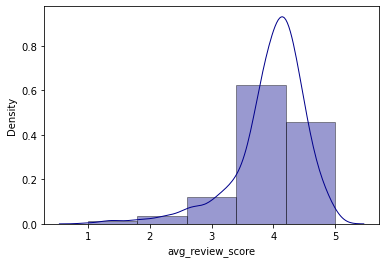

In [55]:
# plotting a histogram
sns.distplot(review_score_seller["avg_review_score"], hist=True, kde=True, 
             bins=int(5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})